In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
import fix_yahoo_finance as yf

In [2]:
Df = yf.download('AAPL', '2008-01-01', '2018-07-08')

[*********************100%***********************]  1 of 1 downloaded


In [3]:
Df=Df[['Close']]

In [4]:
Df

,Close
Date,
2008-01-02,27.834286
2008-01-03,27.847143
2008-01-04,25.721428
2008-01-07,25.377142
2008-01-08,24.464285
2008-01-09,25.628571
2008-01-10,25.431429
2008-01-11,24.670000
2008-01-14,25.540001


In [5]:
Df= Df.dropna()

In [6]:
Df.Close.plot(figsize=(15,10))

In [7]:
plt.title('Apple')
plt.ylabel('Price')

Text(0,0.5,'Price')

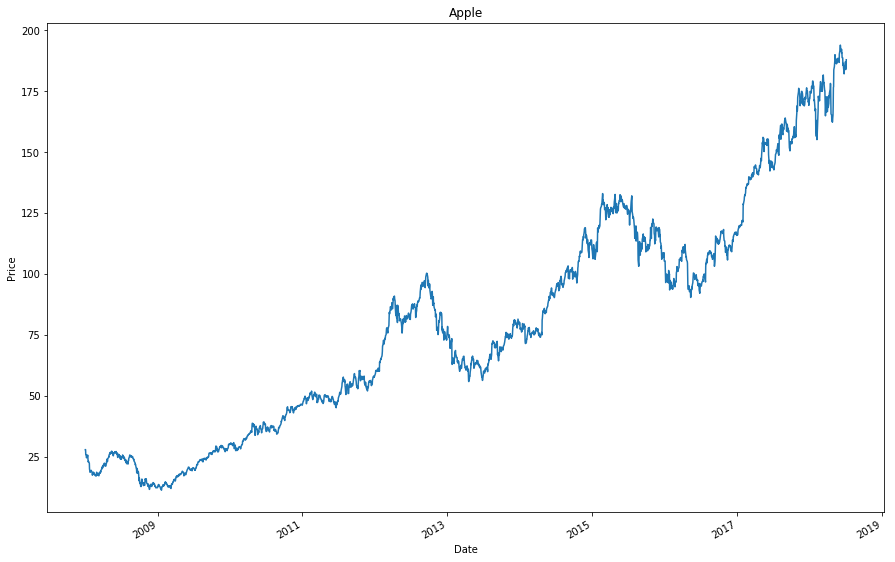

In [8]:
plt.show()

In [12]:
Df['SMA_3'] = Df['Close'].shift(1).rolling(window=3).mean()
Df['SMA_9'] = Df['Close'].shift(1).rolling(window=9).mean()
Df= Df.dropna()
X = Df[['SMA_3','SMA_9']]
X.head()

,SMA_3,SMA_9
Date,,
2008-01-29,18.839048,21.289841
2008-01-30,18.645715,20.694603
2008-01-31,18.749048,20.258730
2008-02-01,19.003810,19.853492
2008-02-04,19.109047,19.415238


In [13]:
y = Df['Close']
y.head()

Date
2008-01-29    18.791430
2008-01-30    18.882856
2008-01-31    19.337143
2008-02-01    19.107143
2008-02-04    18.807142
Name: Close, dtype: float64

In [14]:
t=.8
t= int(t*len(Df))
X_train = X[:t]
y_train = y[:t]
X_test = X[t:]
y_test = y[t:]

In [15]:
## Create Linear regression Model
linear = LinearRegression().fit(X_train,y_train)
print ("Price =", round(linear.coef_[0],2), \
"* 3SMA", round(linear.coef_[1],2), \
"* 9SMA +", round(linear.intercept_,2))

Price = 1.19 * 3SMA -0.19 * 9SMA + 0.13


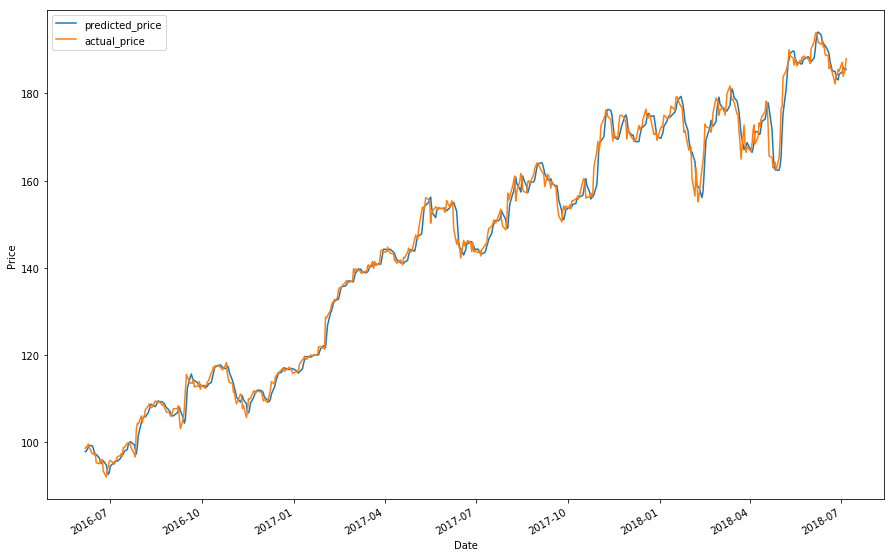

In [16]:
p_price = linear.predict(X_test)
p_price = pd.DataFrame(p_price,index=y_test.index,columns = ['price'])
p_price.plot(figsize=(15,10))
y_test.plot()
plt.legend(['predicted_price','actual_price'])
plt.ylabel("Price")
plt.show()
                                                             

In [17]:
r2 = linear.score(X[t:],y[t:])*100
float("{0:.2f}".format(r2))

99.31